In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
df = pd.read_csv('../../Data/RFP/2025_02_28_M9_combined.csv')
df = df.dropna(subset=['Sequence'])
df = df[df['Rel_RFP'] > 0]
df['Rel_log_RFP'] = np.log1p(df['Rel_RFP'])

df.head()

,Strain,Sequence,Rep,Date,Abs590,Ex550Em630,Rel_RFP,Pred_RFP,Rel_log_RFP
2,pLac,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,Rep1,2024_07_03,1.124517,143364.5,1.274899e+05,0.337836,11.755800
3,pLac,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,Rep2,2024_07_03,1.172258,154328.5,1.316506e+05,0.337836,11.787915
4,Low,AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTAT...,Rep1,2024_07_03,1.097638,1665030.0,1.516921e+06,0.419188,14.232194
5,Low,AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTAT...,Rep2,2024_07_03,1.179940,1871351.5,1.585972e+06,0.419188,14.276709
6,Medium,AATACTAGAGGTCTTCCGACAAGACGCTATTTCCTATTTCTCTTAT...,Rep1,2024_07_03,0.589719,182165.5,3.089020e+05,0.365856,12.640783


In [3]:
model = keras.saving.load_model('../../Models/CNN_6_1_2.keras')

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    for nucleotide in sequence:
         encoding += [mapping[nucleotide]]
    return encoding

df['Pred_RFP'] = model.predict(np.array([padded_one_hot_encode(seq.zfill(150)) for seq in df['Sequence']])).flatten()
df.head()

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


,Strain,Sequence,Rep,Date,Abs590,Ex550Em630,Rel_RFP,Pred_RFP,Rel_log_RFP
2,pLac,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,Rep1,2024_07_03,1.124517,143364.5,1.274899e+05,0.337836,11.755800
3,pLac,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,Rep2,2024_07_03,1.172258,154328.5,1.316506e+05,0.337836,11.787915
4,Low,AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTAT...,Rep1,2024_07_03,1.097638,1665030.0,1.516921e+06,0.419188,14.232194
5,Low,AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTAT...,Rep2,2024_07_03,1.179940,1871351.5,1.585972e+06,0.419188,14.276709
6,Medium,AATACTAGAGGTCTTCCGACAAGACGCTATTTCCTATTTCTCTTAT...,Rep1,2024_07_03,0.589719,182165.5,3.089020e+05,0.365856,12.640783


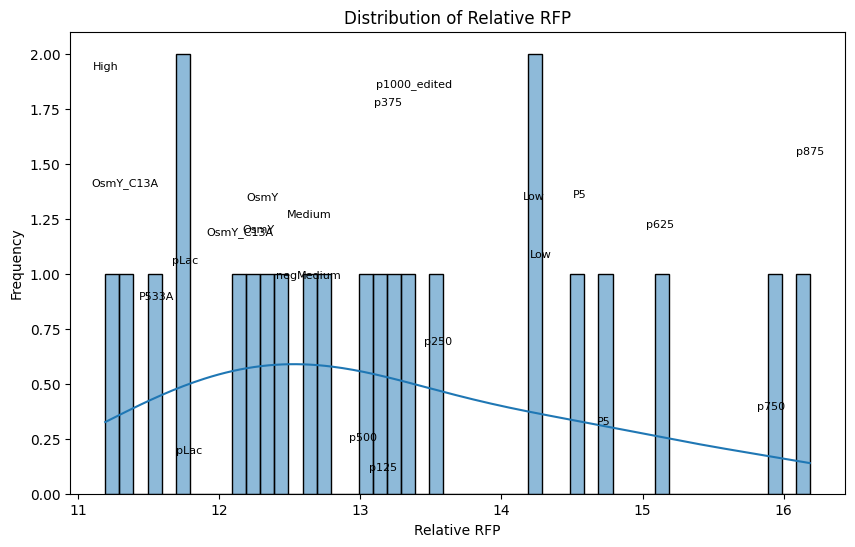

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Rel_log_RFP'], bins=50, kde=True)
plt.title('Distribution of Relative RFP')
plt.xlabel('Relative RFP')
plt.ylabel('Frequency')
for row in df.iterrows():
    plt.text(row[1]['Rel_log_RFP'], np.random.uniform(0,2), row[1]['Strain'], fontsize=8, ha='center', va='bottom')
plt.show()

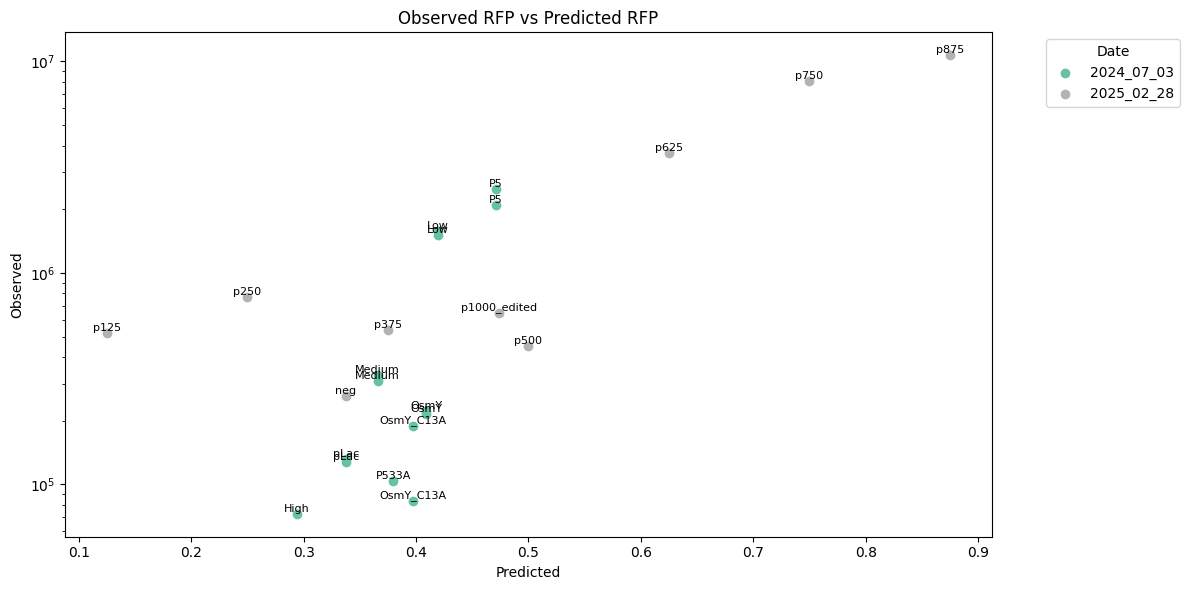

In [5]:
unique_dates = df['Date'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_dates)))
color_map = {date: colors[i] for i, date in enumerate(unique_dates)}

plt.figure(figsize=(12, 6))

for date in unique_dates:
    subset = df[df['Date'] == date]
    color = color_map[date]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=str(date))

plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Observed RFP vs Predicted RFP')

plt.yscale('log')

for row in df.iterrows():
    plt.text(row[1]['Pred_RFP'], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


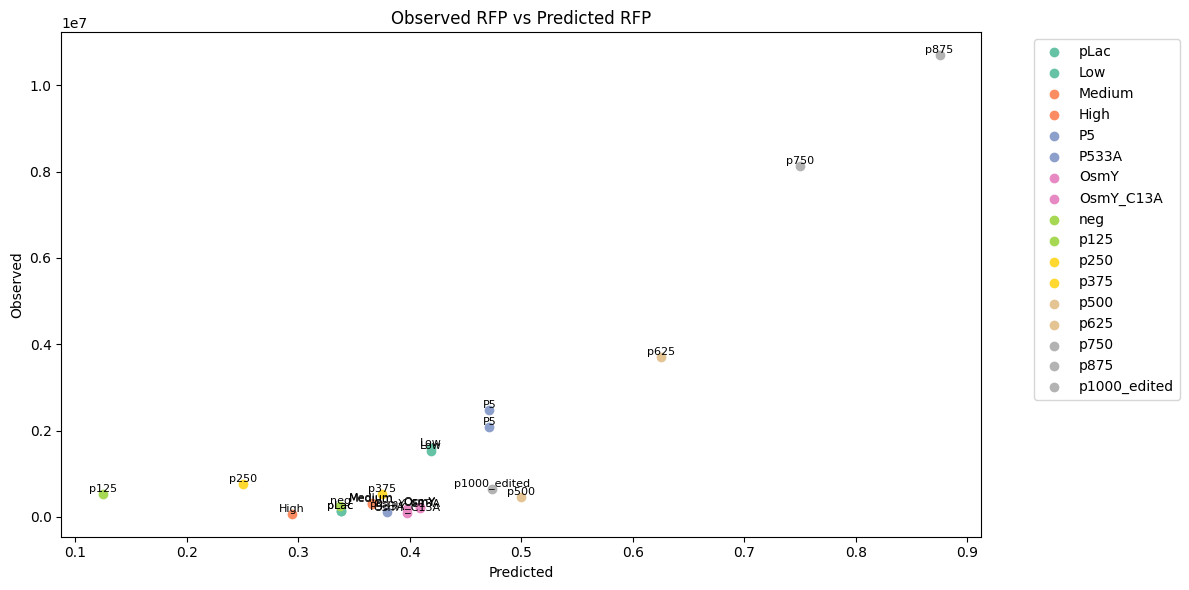

In [6]:
unique_promoters = df['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

plt.figure(figsize=(12, 6))

for promoter in unique_promoters:
    subset = df[df['Strain'] == promoter]
    color = color_map[promoter]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=promoter)

plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Observed RFP vs Predicted RFP')

for row in df.iterrows():
    plt.text(row[1]['Pred_RFP'], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

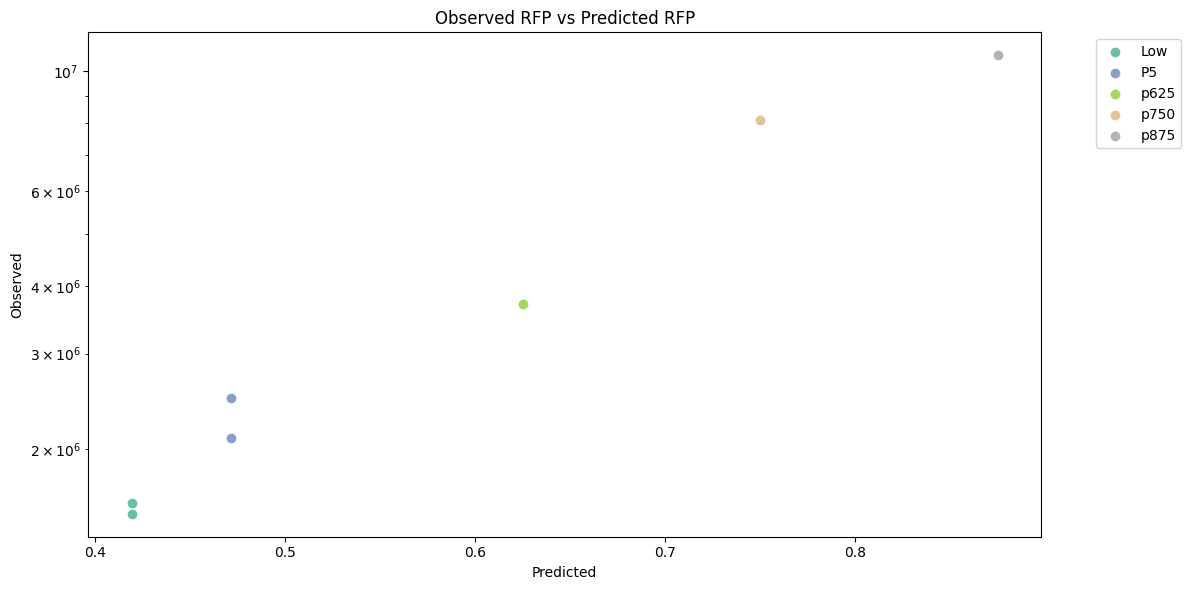

In [7]:
unique_promoters = df[df['Rel_RFP'] > 10**6]['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

plt.figure(figsize=(12, 6))

for promoter in unique_promoters:
    subset = df[df['Strain'] == promoter]
    color = color_map[promoter]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=promoter)

plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Observed RFP vs Predicted RFP')

plt.yscale('log')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Linear regression equation: y = 19828034.0000 * x + -7102957.0000
R² = 0.9602


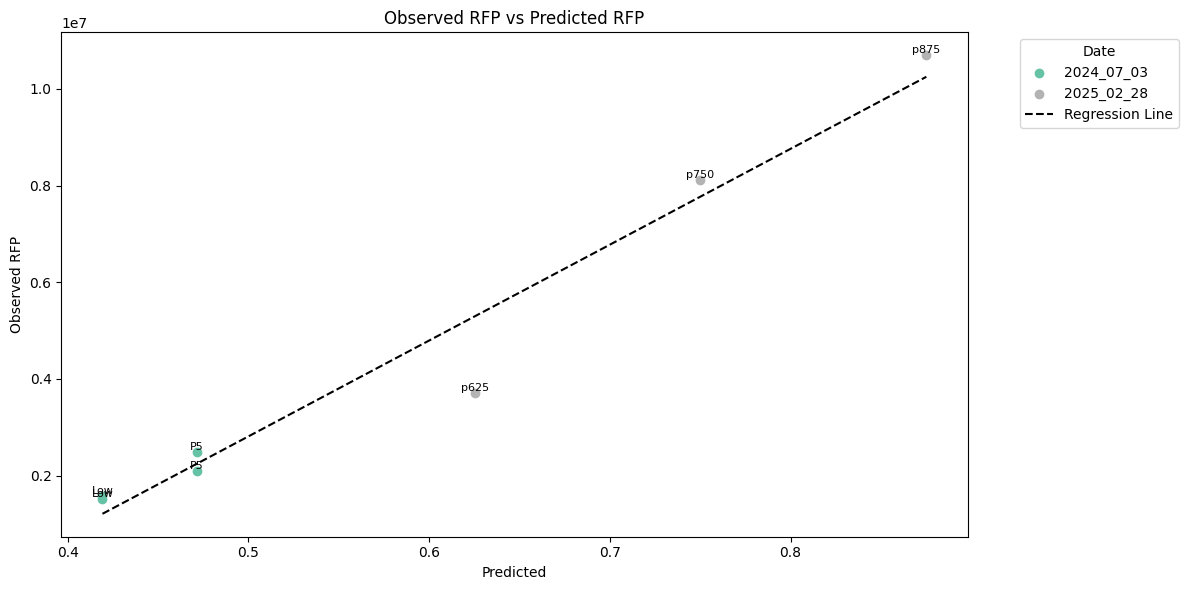

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


subset_df = df[df['Rel_RFP'] > 10**6]

X = subset_df['Pred_RFP'].values.reshape(-1, 1)
y = subset_df['Rel_RFP'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Linear regression equation: y = {slope:.4f} * x + {intercept:.4f}")
print(f"R² = {r_squared:.4f}")

unique_dates = subset_df['Date'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_dates)))
color_map = {date: colors[i] for i, date in enumerate(unique_dates)}

plt.figure(figsize=(12, 6))

for date in unique_dates:
    subset = subset_df[subset_df['Date'] == date]
    color = color_map[date]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=str(date))

x_vals = np.linspace(subset_df['Pred_RFP'].min(), subset_df['Pred_RFP'].max(), 100).reshape(-1, 1)
y_vals = model.predict(x_vals)
plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Regression Line')

plt.xlabel('Predicted')
plt.ylabel('Observed RFP')
plt.title('Observed RFP vs Predicted RFP')

for row in subset_df.iterrows():
    plt.text(row[1]['Pred_RFP'], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


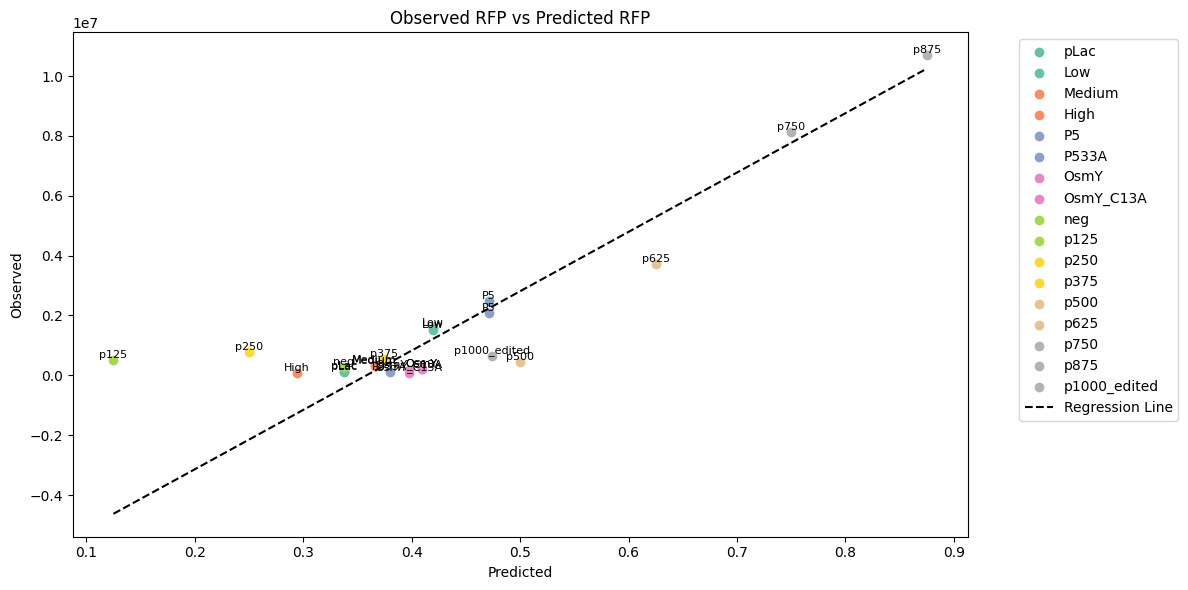

In [9]:
unique_promoters = df['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

plt.figure(figsize=(12, 6))

for promoter in unique_promoters:
    subset = df[df['Strain'] == promoter]
    color = color_map[promoter]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=promoter)

x_vals = np.linspace(df['Pred_RFP'].min(), df['Pred_RFP'].max(), 100).reshape(-1, 1)
y_vals = model.predict(x_vals)
plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Regression Line')

plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Observed RFP vs Predicted RFP')

for row in df.iterrows():
    plt.text(row[1]['Pred_RFP'], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2024_07_03 regression: log10(y) = 8.6724 * x + 2.1145 | R² = 0.6239
2025_02_28 regression: log10(y) = 2.1006 * x + 5.0744 | R² = 0.7233


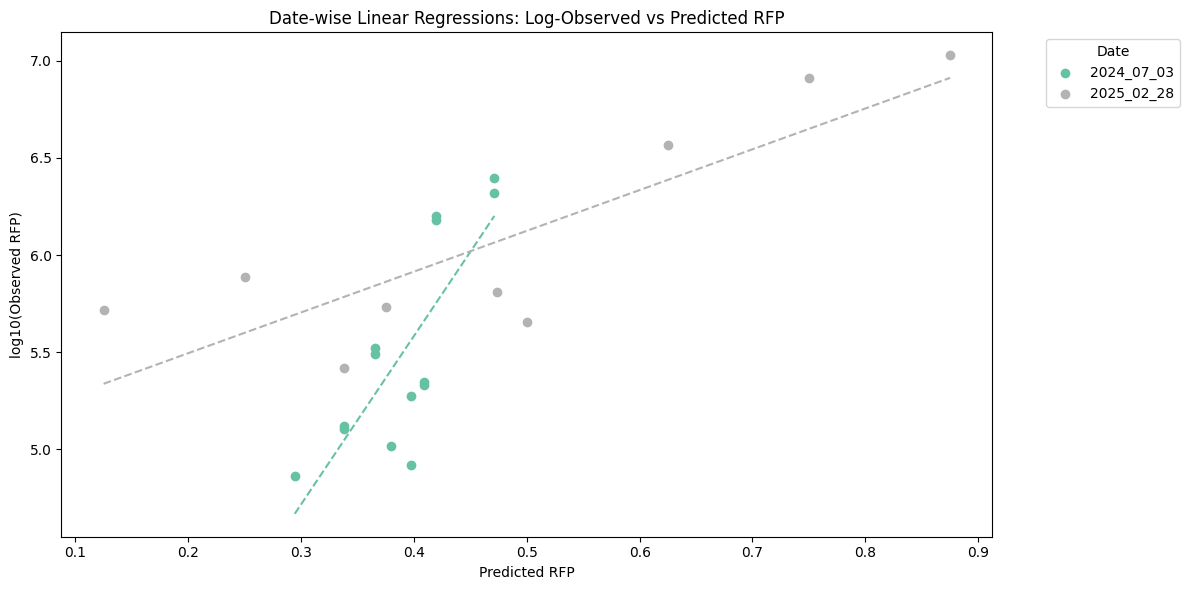

In [10]:
df['log_Rel_RFP'] = np.log10(df['Rel_RFP'])

unique_dates = df['Date'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_dates)))
color_map = {date: colors[i] for i, date in enumerate(unique_dates)}

plt.figure(figsize=(12, 6))

for date in unique_dates:
    subset = df[df['Date'] == date]
    subset = subset[subset['Rel_RFP'] > 0]
    X = subset['Pred_RFP'].values.reshape(-1, 1)
    y = subset['log_Rel_RFP'].values
    color = color_map[date]

    plt.scatter(X, y, color=color, label=str(date))

    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)

    print(f"{date} regression: log10(y) = {slope:.4f} * x + {intercept:.4f} | R² = {r_squared:.4f}")

    x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_vals = model.predict(x_vals)
    plt.plot(x_vals, y_vals, color=color, linestyle='--')

plt.xlabel('Predicted RFP')
plt.ylabel('log10(Observed RFP)')
plt.title('Date-wise Linear Regressions: Log-Observed vs Predicted RFP')

plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2025_02_28 regression: log10(y) = 1.8386 * x + 5.4570 | R² = 0.9278


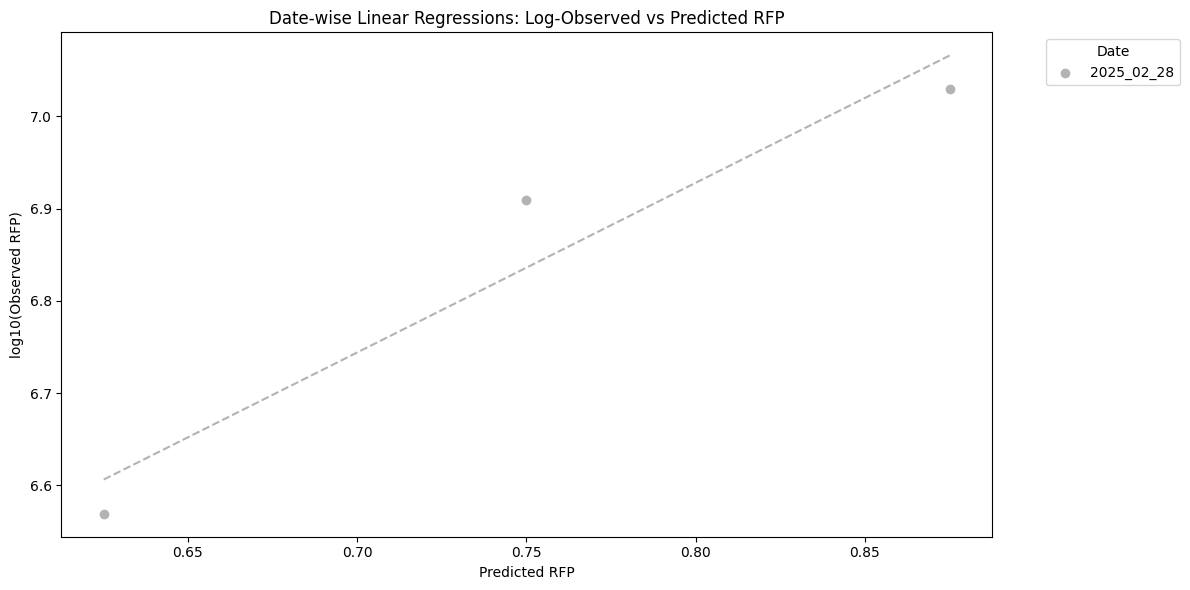

In [11]:
df['log_Rel_RFP'] = np.log10(df['Rel_RFP'])

unique_dates = df['Date'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_dates)))
color_map = {date: colors[i] for i, date in enumerate(unique_dates)}

plt.figure(figsize=(12, 6))

subset = [df['Date'] == date]
subset = df[df['Pred_RFP'] > 0.5]
X = subset['Pred_RFP'].values.reshape(-1, 1)
y = subset['log_Rel_RFP'].values
color = color_map[date]

plt.scatter(X, y, color=color, label=str(date))

model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"{date} regression: log10(y) = {slope:.4f} * x + {intercept:.4f} | R² = {r_squared:.4f}")

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_vals = model.predict(x_vals)
plt.plot(x_vals, y_vals, color=color, linestyle='--')

plt.xlabel('Predicted RFP')
plt.ylabel('log10(Observed RFP)')
plt.title('Date-wise Linear Regressions: Log-Observed vs Predicted RFP')

plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
